<a href="https://colab.research.google.com/github/Nova3012k/Regression-Methods-Machine-Learning-/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Logistic Regression (Regresión Logística)

## **1.1 Fundamentos de la técnica**

La Regresión Logística es un algoritmo de aprendizaje supervisado utilizado principalmente para tareas de clasificación (no de regresión, a pesar de su nombre). Su objetivo es predecir la probabilidad de que una instancia pertenezca a una categoría específica (por ejemplo: sí/no, 0/1, enfermo/sano).

A diferencia de la regresión lineal, que predice valores continuos, la regresión logística transforma su salida utilizando una función logística (Sigmoide) para limitar el resultado entre 0 y 1. Si la probabilidad estimada es superior a un umbral (generalmente 0.5), la instancia se clasifica como la clase positiva; de lo contrario, es la clase negativa.

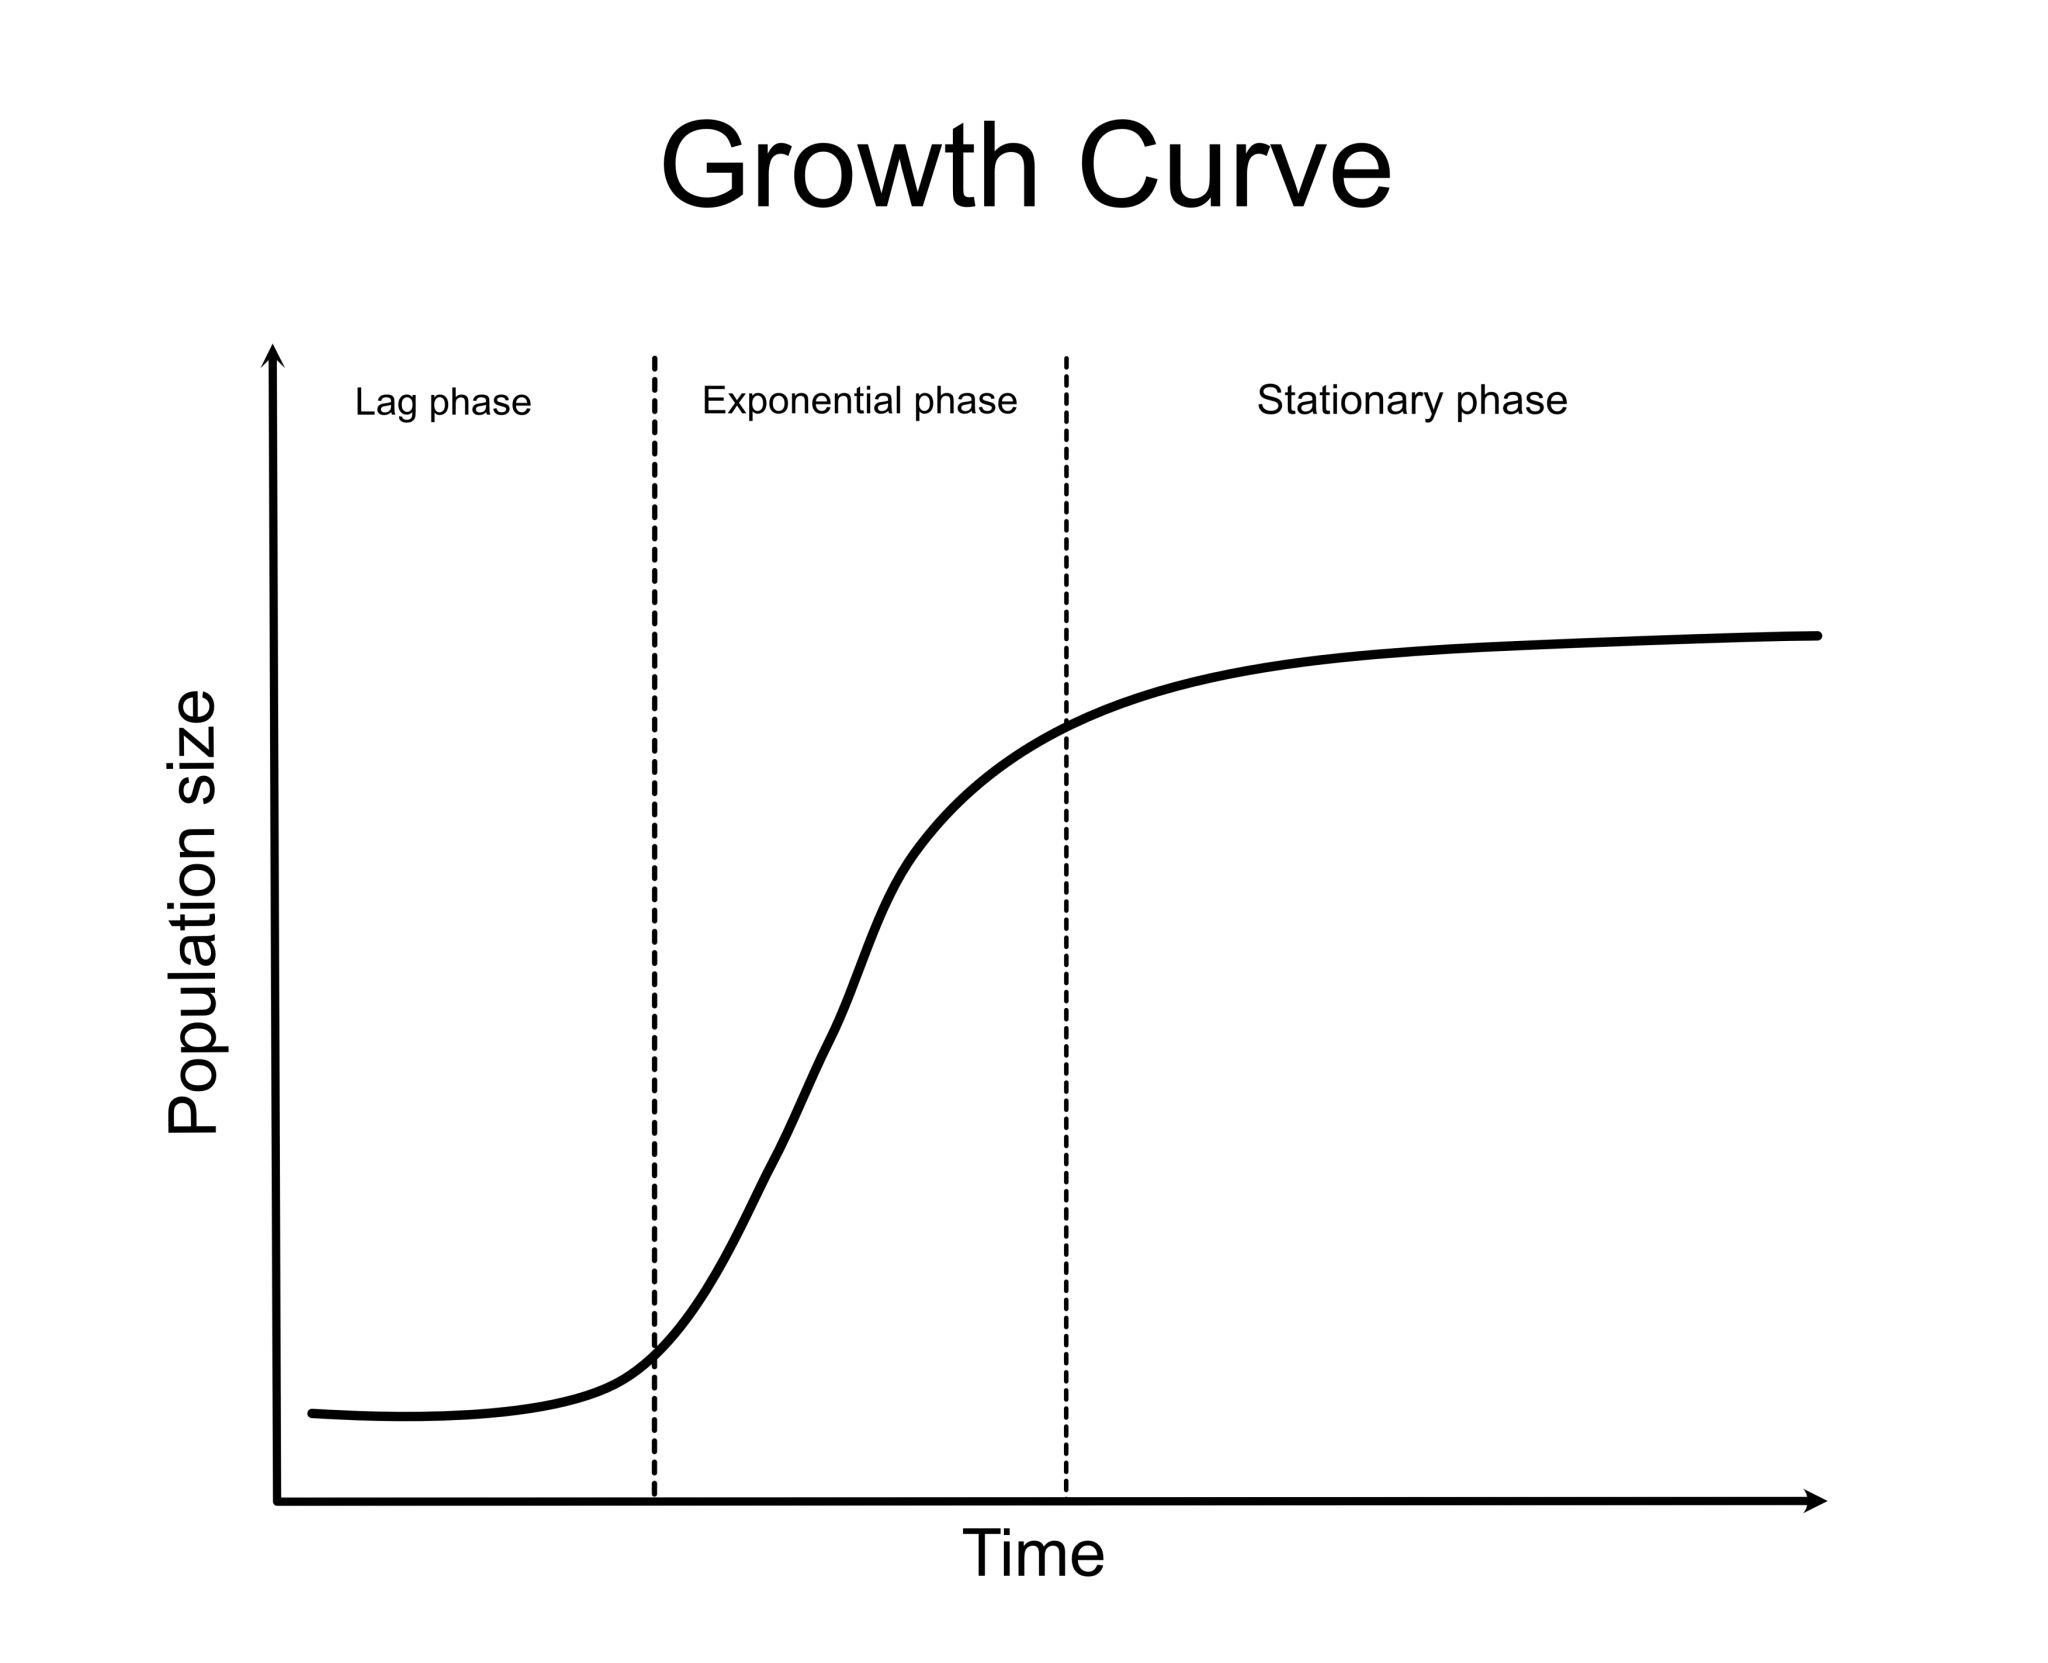

# 1.2 Modelo Matemático de la técnica

El corazón de la regresión logística es la Función Sigmoide.

Primero, el modelo calcula una suma ponderada de las características de entrada (similar a la regresión lineal):
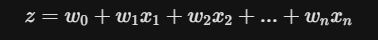

Donde:

$z$ es la salida lineal (logit).

$w$ son los pesos (coeficientes) aprendidos por el modelo.

$x$ son las variables de entrada.

Luego, se aplica la función sigmoide

($\sigma$) a $z$:


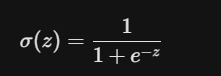

Esta función transforma cualquier valor real de $z$ en un valor en el intervalo $(0, 1)$, que interpretamos como la probabilidad $P(y=1|x)$.Función de Costo (Log Loss): Para entrenar el modelo, no usamos el error cuadrático medio (MSE), sino la Entropía Cruzada (Log Loss), que penaliza fuertemente las predicciones incorrectas con alta confianza

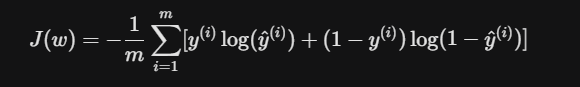


# 1.3 Descripción de la librería y clases (Python)

Para este ejercicio utilizaremos Scikit-Learn (sklearn), la librería estándar de la industria para Machine Learning en Python, junto con Pandas para manejo de datos y Matplotlib/Seaborn para gráficos.

**sklearn.linear_model.LogisticRegression:** Es la clase principal.

**Parámetro solver:** Algoritmo para optimizar (ej. 'liblinear' para datasets pequeños, 'lbfgs' para multiclass).

**Parámetro C:** Inverso de la fuerza de regularización. Valores pequeños especifican una regularización más fuerte (evita overfitting).

**Parámetro max_iter:** Número máximo de iteraciones para que los "solvers" converjan.

**train_test_split:** Función para separar el dataset en entrenamiento y prueba.

**StandardScaler:** Clase para normalizar los datos (restar la media y dividir por la desviación estándar), crucial para que la regresión logística converja eficientemente.

## Carga de Datos y Preprocesamiento

Resumen Estadístico del Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000



Primeras filas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


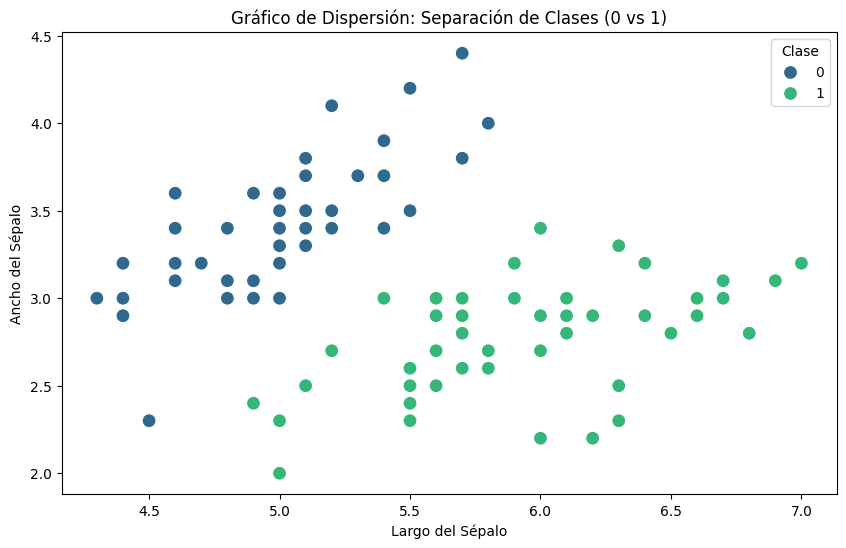

In [ ]:
# 1.4 Pipeline

# --- Importación de Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# --- Preprocesamiento ---

# Cargar dataset (Usaremos Iris, pero lo filtraremos para que sea binario: Setosa vs Versicolor)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# FILTRO: Nos quedamos solo con dos clases (0 y 1) para hacer una Regresión Logística Binaria
df = df[df['target'] != 2]

# Análisis estadístico previo
print("Resumen Estadístico del Dataset:")
display(df.describe())

print("\nPrimeras filas:")
display(df.head())

# Despliegue del Gráfico de Dispersión (Scatter Plot)
# Usaremos 'sepal length' y 'sepal width' para visualizar la separación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis', s=100)
plt.title('Gráfico de Dispersión: Separación de Clases (0 vs 1)')
plt.xlabel('Largo del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend(title='Clase')
plt.show()

# Feature Engineering

En esta etapa seleccionamos las variables más relevantes. Para la Regresión Logística, buscamos:

1. **Alta correlación con el target:** Que la variable ayude a distinguir la clase.

2. **Baja multicolinealidad:** Que las variables independientes no estén muy correlacionadas entre sí (aunque la regularización ayuda a mitigar esto).

**Escalamiento de características:** La regresión logística es sensible a la escala de los datos. Si una variable varía entre 0-1 y otra entre 1000-10000, el algoritmo tardará más en converger y los pesos ($w$) estarán sesgados. Por ello, aplicaremos Estandarización (StandardScaler).

## Seleccion y escalamiento

In [ ]:
# --- Feature Engineering ---

# Selección de variables (X) y target (y)
# En este caso usaremos todas las características disponibles tras el análisis
X = df.drop('target', axis=1)
y = df['target']

# División en Train y Test (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento (StandardScaler)
# Ajustamos el scaler solo con los datos de entrenamiento para evitar "data leakage"
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos escalados correctamente.")
print(f"Tamaño de entrenamiento: {X_train_scaled.shape}")
print(f"Tamaño de prueba: {X_test_scaled.shape}")

# Entrenamiento del Modelo
modelo = LogisticRegression(random_state=42)
modelo.fit(X_train_scaled, y_train)
print("\nModelo entrenado exitosamente.")

Datos escalados correctamente.
Tamaño de entrenamiento: (80, 4)
Tamaño de prueba: (20, 4)

Modelo entrenado exitosamente.


In [ ]:
# --- Prediction ---

def predecir_patron(modelo, scaler, patron):
    """
    Función que recibe un patrón (lista de características),
    lo escala y devuelve la clase predicha.
    """
    # Convertir a array de numpy y redimensionar
    patron_array = np.array(patron).reshape(1, -1)

    # Escalar el patrón usando el MISMO scaler del entrenamiento
    patron_scaled = scaler.transform(patron_array)

    # Predecir
    prediccion = modelo.predict(patron_scaled)
    probabilidad = modelo.predict_proba(patron_scaled)

    clase = "Setosa" if prediccion[0] == 0 else "Versicolor"

    print(f"Patrón recibido: {patron}")
    print(f"Predicción numérica: {prediccion[0]}")
    print(f"Clase Predicha: {clase}")
    print(f"Probabilidad: {np.max(probabilidad)*100:.2f}%")
    return prediccion[0]

# Prueba de la función con un dato inventado (similar a Setosa)
# Orden: sepal length, sepal width, petal length, petal width
nuevo_dato = [5.1, 3.5, 1.4, 0.2]
predecir_patron(modelo, scaler, nuevo_dato)

Patrón recibido: [5.1, 3.5, 1.4, 0.2]
Predicción numérica: 0
Clase Predicha: Setosa
Probabilidad: 98.51%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int64(0)

## Model Evaluation: Fundamentos de Métricas

Para evaluar un modelo de clasificación, comparamos las predicciones con los valores reales.

1. Matriz de Confusión Es una tabla que describe el rendimiento del modelo dividiendo los resultados en cuatro cuadrantes:

- Verdaderos Positivos (TP): El modelo predijo 1 y era 1.

- Verdaderos Negativos (TN): El modelo predijo 0 y era 0.

- Falsos Positivos (FP - Error Tipo I): El modelo predijo 1, pero era 0.

- Falsos Negativos (FN - Error Tipo II): El modelo predijo 0, pero era 1.

2. Accuracy (Exactitud) Es la métrica más intuitiva. Mide el porcentaje de casos clasificados correctamente sobre el total de casos.

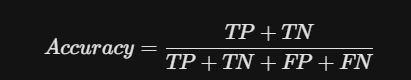

Nota: El accuracy puede ser engañoso si las clases están desbalanceadas (ej. 99% de datos son clase 0), por lo que siempre se debe analizar junto a la matriz de confusión.

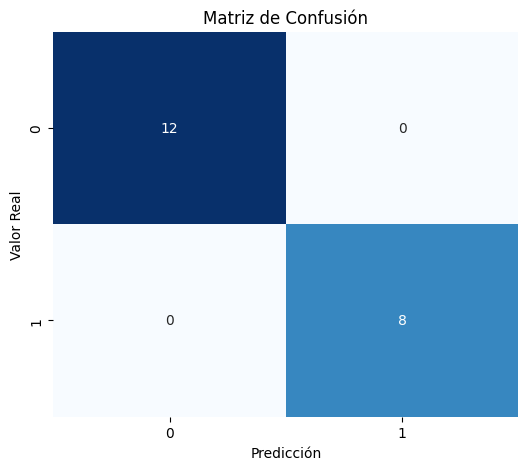

Accuracy del modelo: 1.0000 (100.00%)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# --- Model Evaluation ---

# Realizar predicciones sobre el conjunto de test
y_pred = modelo.predict(X_test_scaled)

# 1. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# 2. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {acc:.4f} ({acc*100:.2f}%)")

# Reporte completo opcional
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

## Referencias Bibliográficas

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Raschka, S., & Mirjalili, V. (2019). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2 (3rd ed.). Packt Publishing.